# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
data = pd.read_csv('data/vehicles.csv')
data.head(-5)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426870,7301592119,wyoming,22990,2020.0,hyundai,sonata se sedan 4d,good,NaN,gas,3066.0,clean,other,5NPEG4JAXLH051710,fwd,NaN,sedan,blue,wy
426871,7301591639,wyoming,17990,2018.0,kia,sportage lx sport utility 4d,good,NaN,gas,34239.0,clean,other,KNDPMCAC7J7417329,NaN,NaN,SUV,NaN,wy
426872,7301591201,wyoming,32590,2020.0,mercedes-benz,c-class c 300,good,NaN,gas,19059.0,clean,other,55SWF8DB6LU325050,rwd,NaN,sedan,white,wy
426873,7301591202,wyoming,30990,2018.0,mercedes-benz,glc 300 sport,good,NaN,gas,15080.0,clean,automatic,WDC0G4JB6JV019749,rwd,NaN,other,white,wy


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [83]:
data.describe()

,id,price,year,odometer
count,4.213420e+05,4.213420e+05,421342.000000,4.213420e+05
mean,7.311491e+09,7.129578e+04,2011.225487,9.819949e+04
std,4.383000e+06,1.207183e+07,9.462710,2.135726e+05
min,7.301583e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308141e+09,5.975000e+03,2008.000000,3.795100e+04
50%,7.312617e+09,1.398800e+04,2013.000000,8.582700e+04
75%,7.315253e+09,2.649500e+04,2017.000000,1.338000e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


There is a considerable gap between maximum value and 75 percentile of columns price and odometer. This shows there is outlier in this dataset

Text(0.5, 1.0, 'Number of missing values in each feature')

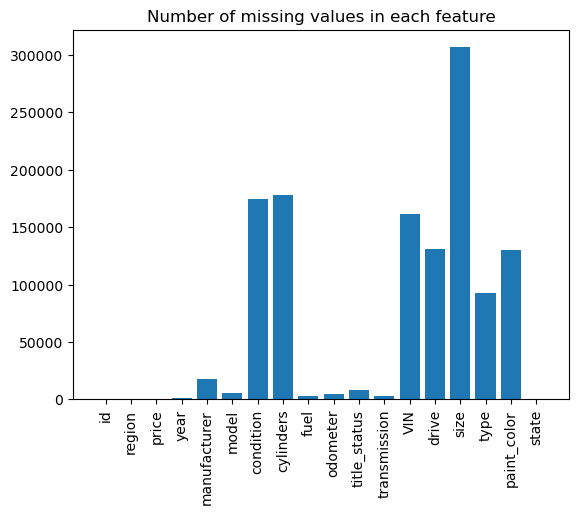

In [41]:
missing_vals = data.isna().sum()
plt.xticks(rotation=90)
plt.bar(x=missing_vals.index, height=missing_vals)
plt.title('Number of missing values in each feature')


It appears that a lot of missing values are in the categorical features. Since there is a high number of missing values in those feature, we will keep them in the data for now. For the numerical features, we drop the rows that contain NULL values.

In [82]:
# Check if there are duplicated rows in the dataset
data.duplicated().sum()

0

No duplicated rows in the dataset.

What is the relation between price of the car and year build?

<BarContainer object of 113 artists>

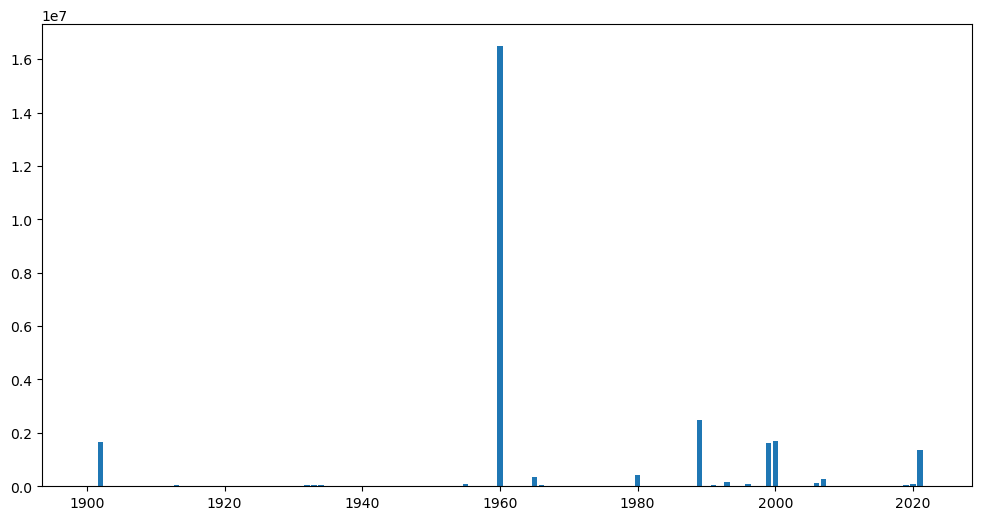

In [53]:
plt.figure(figsize=(12, 6))
mean_price_yearly = data.groupby('year')[['price']].mean().reset_index()
plt.bar(mean_price_yearly['year'], mean_price_yearly['price'])

As expected, there is an outlier in the year 1960. We have to remove the outliers in the dataset for better analysis.

In [54]:
data[data['year'] == 1960].sort_values('price', ascending=False)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
280,7315849335,birmingham,987654321,1960.0,chevrolet,NaN,NaN,NaN,gas,999999.0,clean,manual,NaN,NaN,NaN,NaN,NaN,al
122470,7315836487,atlanta,987654321,1960.0,chevrolet,NaN,NaN,NaN,gas,9999999.0,clean,manual,NaN,NaN,NaN,NaN,NaN,ga
300647,7302491701,mansfield,79995,1960.0,ford,galaxie 500 starliner,good,8 cylinders,other,4230.0,clean,other,0J53X160453,NaN,NaN,other,NaN,oh
105722,7314299747,orlando,79500,1960.0,chevrolet,corvette fuel injected,NaN,8 cylinders,gas,273.0,clean,manual,00867S102504,rwd,NaN,convertible,black,fl
124011,7314296125,atlanta,79500,1960.0,chevrolet,corvette fuel injected,NaN,8 cylinders,gas,273.0,clean,manual,00867S102504,rwd,NaN,convertible,black,ga
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320806,7302867702,medford-ashland,1,1960.0,pontiac,ventura,new,NaN,gas,1.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,or
164628,7316015924,"kansas city, MO",1,1960.0,NaN,any and all,NaN,NaN,other,1.0,clean,other,NaN,NaN,NaN,NaN,NaN,ks
407611,7316951348,seattle-tacoma,1,1960.0,NaN,1960 Lotus Elite,NaN,NaN,gas,34000.0,clean,manual,NaN,NaN,NaN,NaN,NaN,wa
42887,7314559901,orange county,0,1960.0,NaN,"Corvettes, classics, exotics",NaN,NaN,gas,10000.0,clean,other,NaN,NaN,NaN,NaN,NaN,ca


id = 7315849335 and 7315836487 are the records with a very high value. In the next section, data preparation, we will handle these outliers in the numerical features.

In [84]:
# data.drop(index=[280, 122470], inplace=True)

What is the relation between car manufacturer and price of the car considering the title of the car?

c:\Users\hoo11155\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


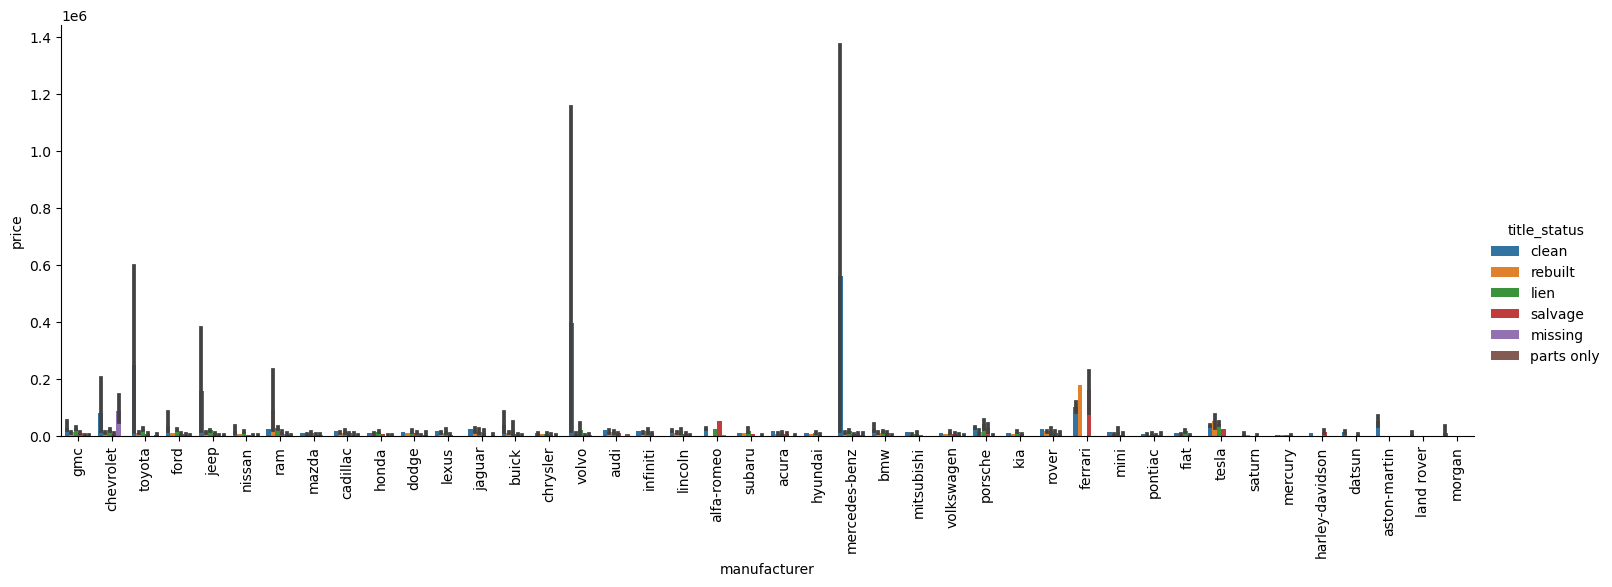

In [65]:
price_manufacture = sns.catplot(data=data, x='manufacturer', y='price', hue='title_status', kind='bar', aspect=3)
price_manufacture.set_xticklabels(rotation=90)

According to the plot, clean title cars have higher price and among all the manufaturers Mercedes-benz and Volvo are higher priced in this dataset.

Top 10 manufacturer based on the number of records available

Text(0.5, 1.0, 'Number of cars in each car brand')

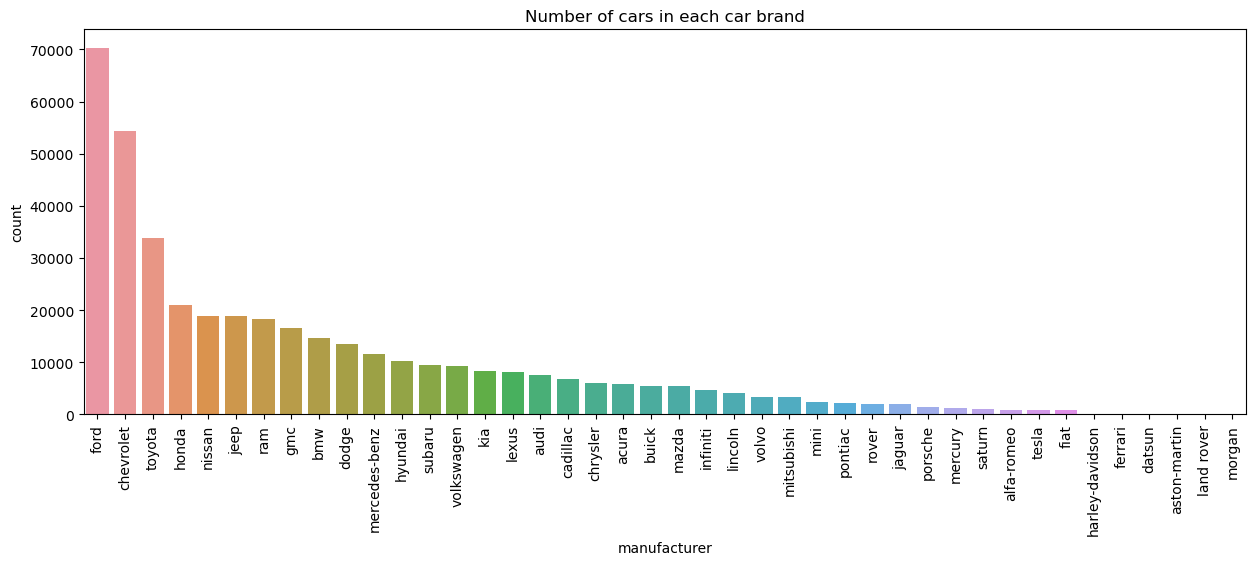

In [79]:
plt.figure(figsize=(15, 5))
plt.xticks(rotation=90)
sns.countplot(data=data, x='manufacturer', order=data['manufacturer'].value_counts(ascending=False).index)
plt.title("Number of cars in each car brand")

According to this plot, American brands like Ford and Chevrolet are the most prevalent, with a signification proportion of the total vehicles being of these makes. Toyota and Honda also feature prominently in the dataset with a substantial number of their models represented. It is interesting to see that the most expensive cars that was obsereved in the previous plot are not on the top produced car brands.

What is breakdown of car conditions and number of cylinders in the dataset?

In [86]:
data.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')

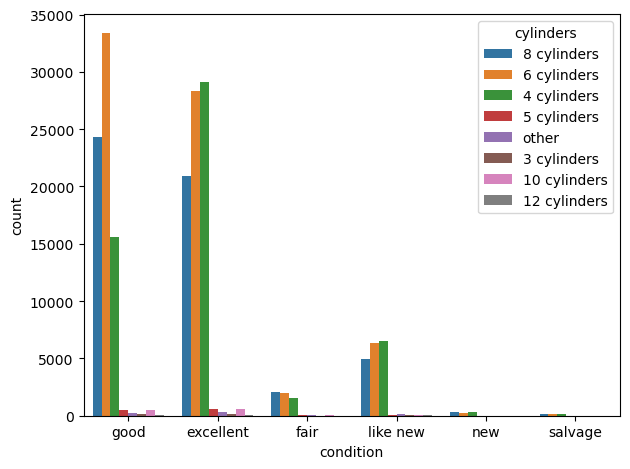

In [90]:
sns.countplot(data=data, x='condition', hue='cylinders')
plt.tight_layout()

The prevalence of 4-cylinder engines is higher in new cars, while older cars in good condition ten to have bigger engine, 6 cylinders. This can be attributed to engineers opting for smaller enginers to enhance efficiency while manitaning comparable power outpu and reducing fuel consumption.

Does color have any effect on the price?

<Axes: xlabel='paint_color', ylabel='price'>

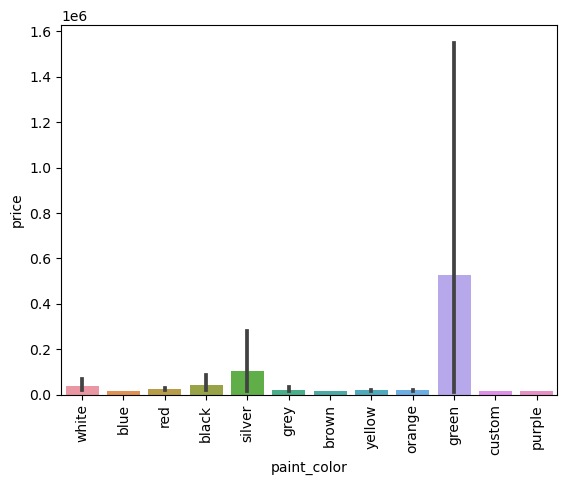

In [93]:
plt.xticks(rotation=90)
sns.barplot(data=data, x='paint_color', y='price')

Interestingly the green color car are of higher price comparing to others. This shows that color affects the price of the color to an extent.

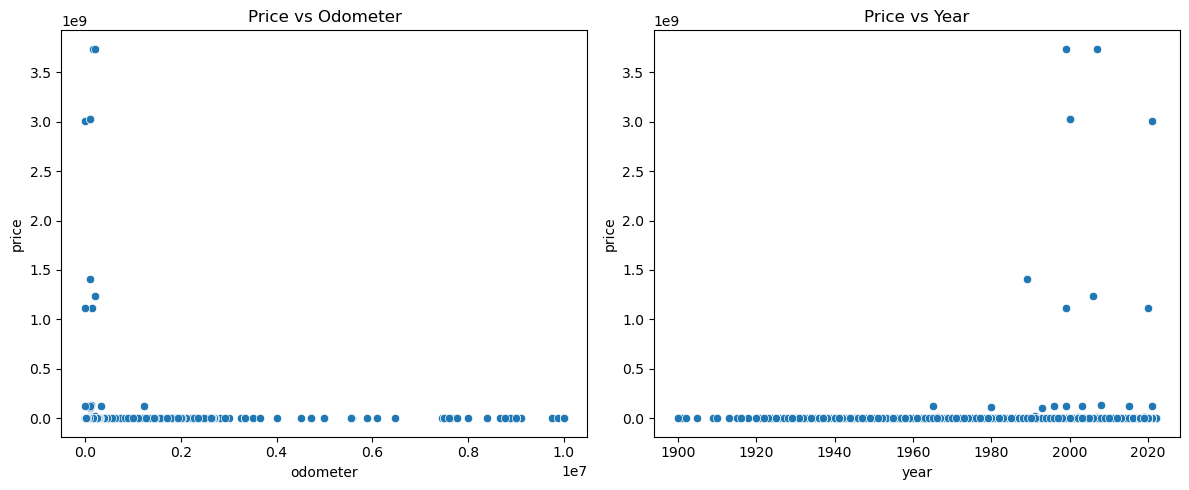

In [101]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(x='odometer', y='price', data=data, ax=ax[0])
ax[0].set_title('Price vs Odometer')
sns.scatterplot(x='year', y='price', data=data, ax=ax[1])
ax[1].set_title('Price vs Year')
plt.tight_layout()

From the two plots above, the newer cars have lower milage on them. However, due to existence of outliers, we cannot see the values properly. In the section, where we handle outliers we can take a look at this relationship once more.

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [88]:
## TO DO ##
# Handle outliers

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.